In [20]:
import numpy as np
import matplotlib.pyplot as plt

from src.exponential_regression import ExponentialRegression
from src.loss import Chi2Loss

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

# Non-exponential data

$f(t) = 2 + 3t + 4t^2 + 5t^3$

In [21]:
measurements_amount = 100

t = np.linspace(-2, 1, measurements_amount).reshape(-1, 1)
target = (2 + 3*t + 4*t**2 + 5*t**3).ravel()

In [22]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

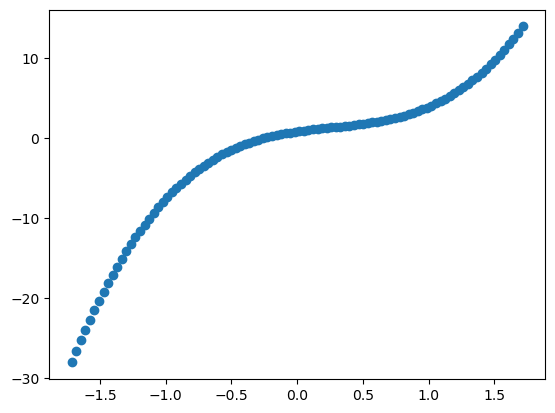

In [23]:
plt.scatter(t_scaled, target)

In [24]:
loss = Chi2Loss(measurements_amount)
init_lambda = np.array([-1., -1.])
init_omega = np.array([1., -1.])
model = ExponentialRegression(n_terms=2, loss_function=loss, 
                              initial_lambda=init_lambda, initial_omega=init_omega)
model.fit(t_scaled, target)

ExponentialRegression(initial_lambda=array([-1., -1.]),
                      initial_omega=array([ 1., -1.]), loss_function=Chi2Loss,
                      n_terms=2)

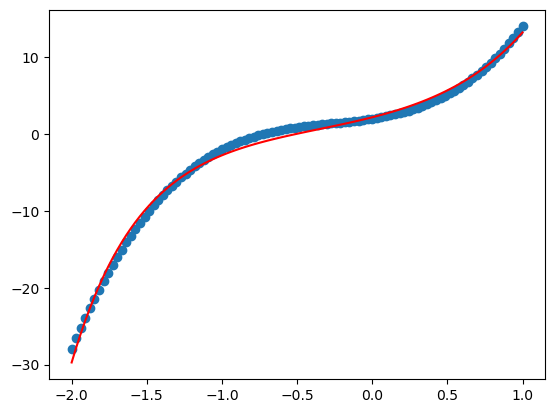

In [25]:
plt.scatter(t, target)
plt.plot(t, model.predict(t_scaled), color='red')

$f(t) = sin(t)$

In [26]:
measurements_amount = 100

t = np.linspace(-2, 1, measurements_amount).reshape(-1, 1)
target = np.sin(t).ravel()

In [27]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

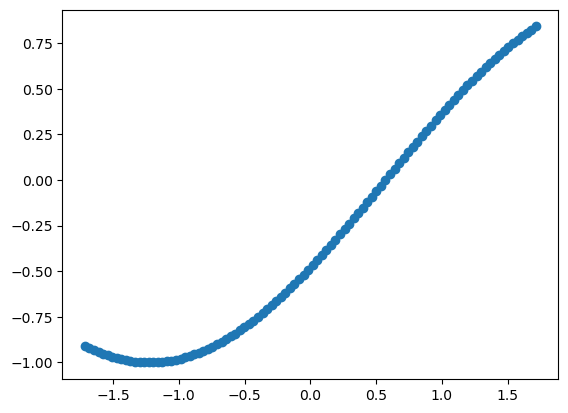

In [28]:
plt.scatter(t_scaled, target)

In [39]:
param_range = np.linspace(-2, 2, 100)
loss = Chi2Loss(measurements_amount)
tries_amount = 1000
best_loss = np.inf
best_model = None
n_terms = 3

for _ in tqdm(range(tries_amount)):
    init_lambda = np.random.choice(param_range, n_terms)
    init_omega = np.random.choice(param_range, n_terms)
    model = ExponentialRegression(n_terms=n_terms, loss_function=loss, 
                                  initial_lambda=init_lambda, initial_omega=init_omega)
    model.fit(t_scaled, target)
    if model.loss_ < best_loss:
        best_loss = model.loss_
        best_model = model


100%|██████████| 1000/1000 [00:01<00:00, 710.80it/s]


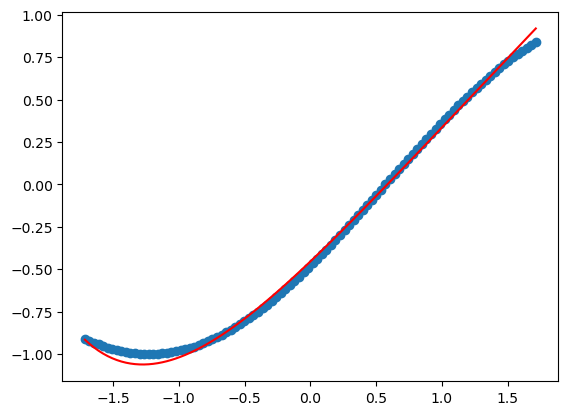

In [40]:
plt.scatter(t_scaled, target)
plt.plot(t_scaled, best_model.predict(t_scaled), color='red')

$f(t) = exp(-x^2)$

In [65]:
t = np.linspace(-3, 3, measurements_amount).reshape(-1, 1)
target = np.exp(-t**2).ravel()

In [66]:
scaler = StandardScaler()
t_scaled = scaler.fit_transform(t)

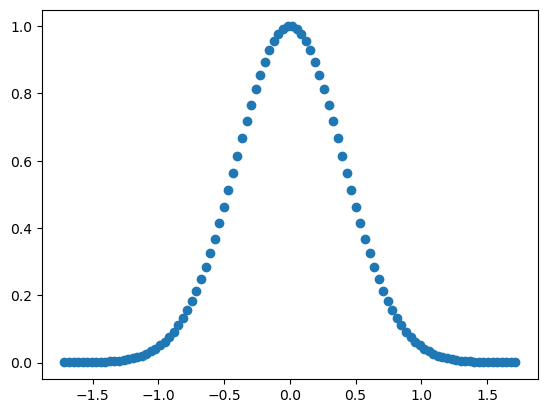

In [67]:
plt.scatter(t_scaled, target)

In [70]:
param_range = np.linspace(-5, 5, 1000)
loss = Chi2Loss(measurements_amount)
tries_amount = 1_000
best_loss = np.inf
best_model = None
n_terms = 10

for _ in tqdm(range(tries_amount)):
    init_lambda = np.random.choice(param_range, n_terms)
    init_omega = np.random.choice(param_range, n_terms)
    model = ExponentialRegression(n_terms=n_terms, loss_function=loss, 
                                  initial_lambda=init_lambda, initial_omega=init_omega)
    model.fit(t_scaled, target)
    if model.loss_ < best_loss:
        best_loss = model.loss_
        best_model = model

100%|██████████| 1000/1000 [00:03<00:00, 309.13it/s]


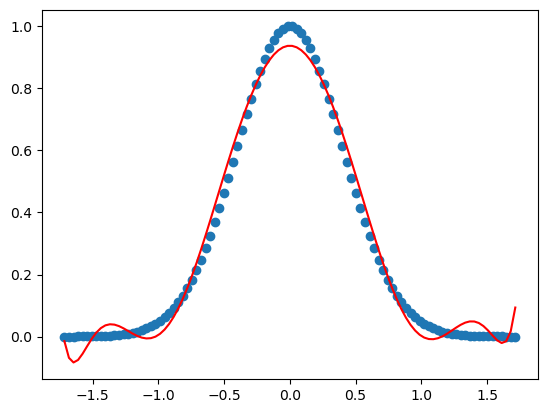

In [71]:
plt.scatter(t_scaled, target)
plt.plot(t_scaled, best_model.predict(t_scaled), color='red')